In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsRegressor
from IPython.display import display
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
import operator
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/home/sudoh/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
pdg = pd.read_csv('DatasetGP.csv')

In [4]:
pdg.head()

,Time,Flowrate,Pressure
0,505.524861,23034.7066,8213.8599
1,505.947361,23035.3008,8213.7629
2,506.369861,23035.1155,8213.5498
3,506.792361,23039.9866,8213.4960
4,507.214861,23035.9354,8213.3491


In [5]:
len(pdg)

600

In [46]:
#Adding noise to the dataset
mu, sigma = 0, 0.5
np.random.seed(9001)
noise = np.random.normal(mu, sigma, pdg.shape)

In [47]:
noise

array([[ 0.10037256,  0.42968642,  0.78973455],
       [ 0.00617719, -0.024142  ,  0.41346036],
       [ 0.41510447,  0.31159223, -0.08134143],
       ..., 
       [-0.4862097 , -0.15597618,  0.28467094],
       [ 0.24077192,  0.00593319, -0.28659416],
       [ 1.0599004 , -0.2654972 , -0.22825041]])

In [48]:
Flowrate_noise = pdg['Flowrate'].values + noise[:,1]
Pressure_noise = pdg['Pressure'].values + noise[:,2]
Flowrate_noise = pd.DataFrame(Flowrate_noise)
Pressure_noise = pd.DataFrame(Pressure_noise)

In [49]:
pdg_df = pdg.assign(Flowrate_noise = Flowrate_noise.values, Pressure_noise = Pressure_noise.values)

In [50]:
pdg_df.head()

,Time,Flowrate,Pressure,Flowrate_noise,Pressure_noise
0,505.524861,23034.7066,8213.8599,23035.136286,8214.649635
1,505.947361,23035.3008,8213.7629,23035.276658,8214.176360
2,506.369861,23035.1155,8213.5498,23035.427092,8213.468459
3,506.792361,23039.9866,8213.4960,23039.680954,8212.567950
4,507.214861,23035.9354,8213.3491,23035.846790,8213.543383


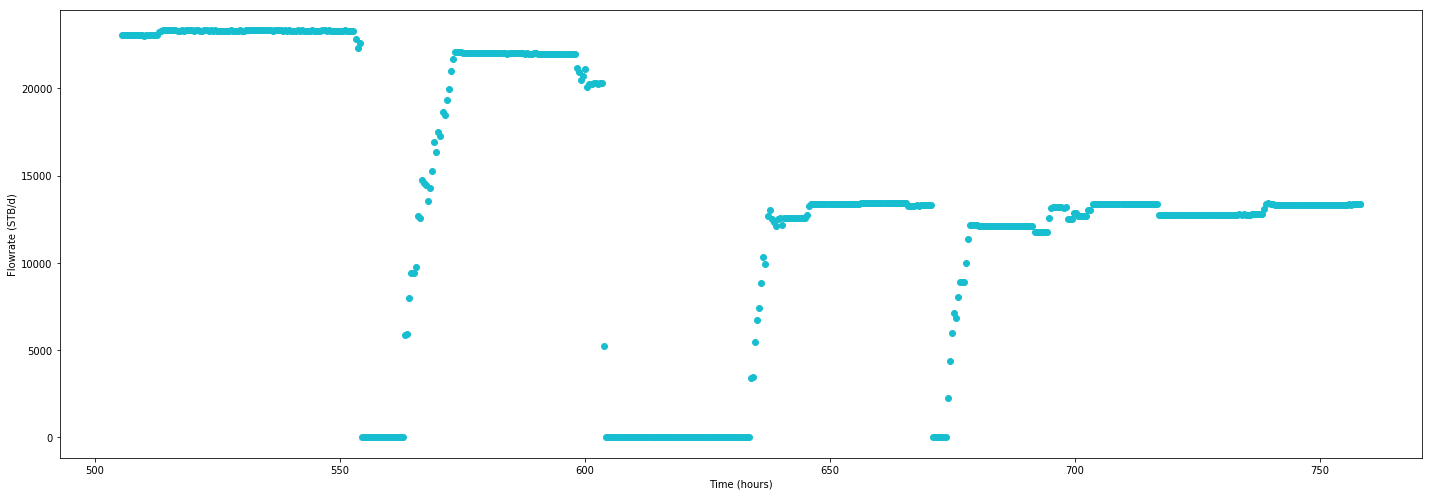

In [56]:
plt.figure(figsize = (20,7))
plt.scatter(pdg_df['Time'], pdg_df['Flowrate'], color = '#17becf')
plt.xlabel('Time (hours)')
plt.ylabel('Flowrate (STB/d)')
#plt.title('')
plt.tight_layout()
#plt.savefig('num_tracks.png')

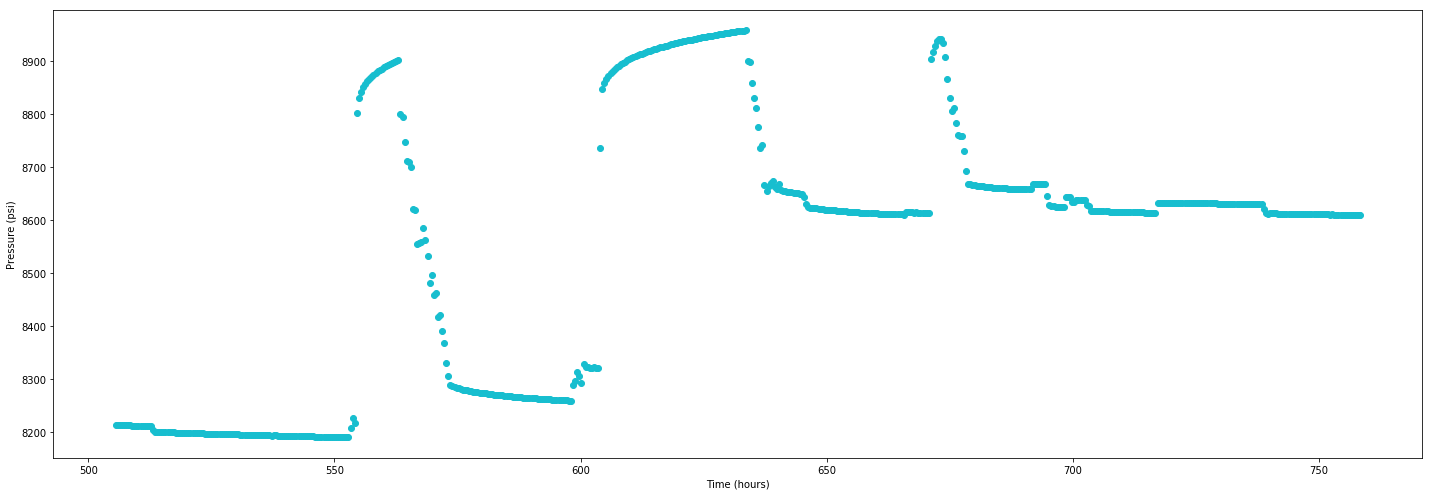

In [57]:
plt.figure(figsize = (20,7))
plt.scatter(pdg_df['Time'], pdg_df['Pressure'], color = '#17becf')
plt.xlabel('Time (hours)')
plt.ylabel('Pressure (psi)')
#plt.title('')
plt.tight_layout()
#plt.savefig('num_tracks.png')

In [60]:
train = pdg_df.head(450)

In [65]:
train.tail()

,Time,Flowrate,Pressure,Flowrate_noise,Pressure_noise
445,693.526527,11783.5162,8667.5232,11783.423967,8666.948135
446,693.949027,11781.6806,8667.4733,11782.299159,8667.160204
447,694.371527,11782.9325,8667.4090,11783.122186,8667.123746
448,694.794027,12598.7405,8645.0775,12598.637904,8644.998190
449,695.216527,13145.5440,8628.3773,13145.374117,8629.323447


In [63]:
test = pdg_df.tail(150)

In [64]:
test.head()

,Time,Flowrate,Pressure,Flowrate_noise,Pressure_noise
450,695.639027,13191.0346,8626.0579,13190.891269,8626.945806
451,696.061527,13190.6150,8625.7085,13190.705276,8625.237619
452,696.484027,13186.1510,8625.1959,13186.210759,8626.320031
453,696.906527,13185.1718,8624.9885,13185.622858,8624.129329
454,697.329027,13182.2957,8624.6938,13182.462681,8625.292883


## Building our predictive model

In [66]:
# get variables
x_train = train.iloc[:,0:1]
y_train = train.iloc[:,2]

x_test = test.iloc[:,0:1]
y_test = test.iloc[:,2]

## Building our base model

## Linear regression model

In [68]:
x_train2 = sm.add_constant(x_train.values)
model = sm.OLS(y_train.values, x_train2)
results = model.fit()

y_hat_train = results.predict(x_train2)

# test case
x_test2 = sm.add_constant(x_test.values)
y_hat_test = results.predict(x_test2)

r2_score_train = r2_score(y_train, y_hat_train) 
r2_score_test = r2_score(y_test, y_hat_test)

print('R^2 Values for Train, Test Using Linear Regression:', r2_score_train, r2_score_test)

R^2 Values for Train, Test Using Linear Regression: 0.418131684757 -1124.99028837


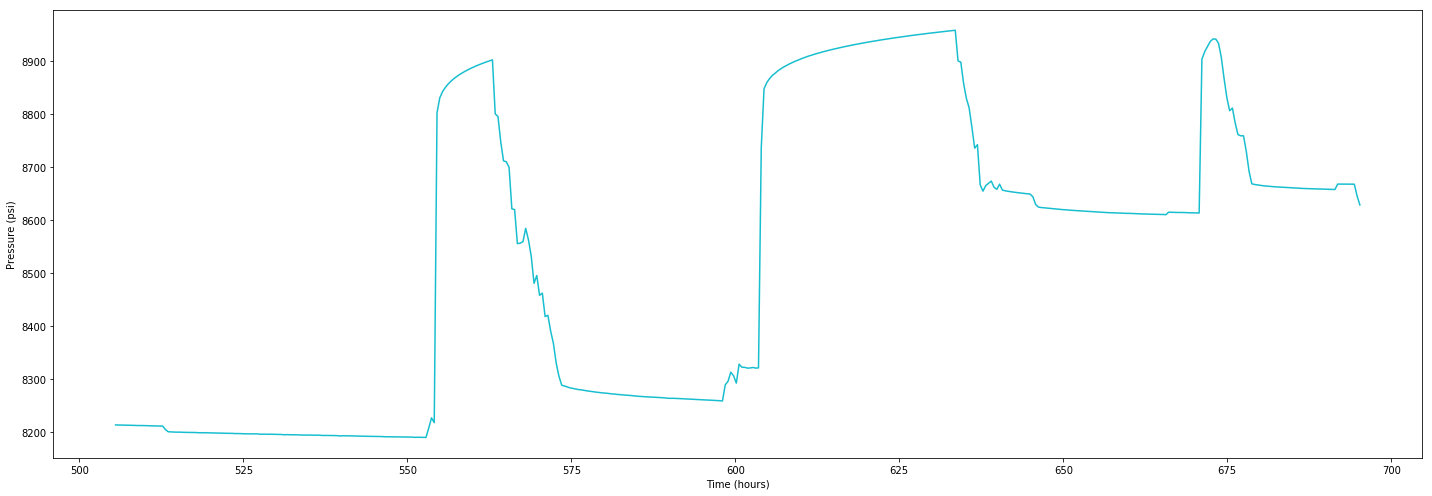

In [79]:
from statsmodels.graphics.api import abline_plot
fig = plt.figure(figsize = (20,7))
ax = fig.add_subplot(111, ylabel='Pressure (psi)', xlabel='Time (hours)')
ax.plot(train['Time'], train['Pressure'], color = '#17becf')
#plt.xlabel('Time (hours)')
#plt.ylabel('Pressure (psi)')
#plt.title('')
#fig = abline_plot(model_results = results, ax=ax)
plt.tight_layout()
#plt.savefig('num_tracks.png')